# Introduction to CNN and Computer Vision with TensorFlow

## Get the data

In [7]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-04-20 15:42:27--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.145.128, 172.217.219.128, 209.85.146.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.145.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   114MB/s    in 0.9s    

2023-04-20 15:42:28 (114 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)

In [8]:
!ls pizza_steak

test  train


In [9]:
!ls pizza_steak/train

pizza  steak


In [10]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [11]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [12]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Apr 20 15:42 .
drwxr-xr-x 1 root root 4096 Apr 20 15:42 ..
drwxr-xr-x 4 root root 4096 Apr 20 15:42 test
drwxr-xr-x 4 root root 4096 Apr 20 15:42 train


In [13]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [14]:
import pathlib
import numpy  as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class

  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")

  return img

['2501961.jpg']
Image shape: (512, 512, 3)


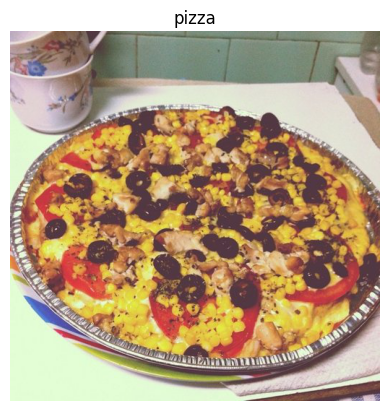

In [16]:
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [17]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[195, 172, 200],
        [191, 168, 196],
        [189, 169, 196],
        ...,
        [105, 105,  81],
        [101, 101,  77],
        [ 99,  99,  75]],

       [[193, 173, 200],
        [190, 170, 195],
        [190, 170, 195],
        ...,
        [102, 102,  78],
        [100, 100,  76],
        [ 98,  98,  74]],

       [[190, 170, 195],
        [189, 170, 192],
        [189, 170, 192],
        ...,
        [101, 101,  77],
        [101, 101,  77],
        [101, 101,  77]],

       ...,

       [[227, 254, 213],
        [227, 254, 213],
        [227, 254, 213],
        ...,
        [168, 154, 187],
        [157, 146, 180],
        [105,  93, 129]],

       [[227, 254, 213],
        [227, 254, 213],
        [227, 254, 213],
        ...,
        [146, 132, 165],
        [123, 109, 144],
        [122, 108, 143]],

       [[227, 254, 213],
        [227, 254, 213],
        [227, 254, 213],
        ...,
        [120, 107, 13

In [18]:
img.shape

(512, 512, 3)

In [19]:
img/255

array([[[0.76470588, 0.6745098 , 0.78431373],
        [0.74901961, 0.65882353, 0.76862745],
        [0.74117647, 0.6627451 , 0.76862745],
        ...,
        [0.41176471, 0.41176471, 0.31764706],
        [0.39607843, 0.39607843, 0.30196078],
        [0.38823529, 0.38823529, 0.29411765]],

       [[0.75686275, 0.67843137, 0.78431373],
        [0.74509804, 0.66666667, 0.76470588],
        [0.74509804, 0.66666667, 0.76470588],
        ...,
        [0.4       , 0.4       , 0.30588235],
        [0.39215686, 0.39215686, 0.29803922],
        [0.38431373, 0.38431373, 0.29019608]],

       [[0.74509804, 0.66666667, 0.76470588],
        [0.74117647, 0.66666667, 0.75294118],
        [0.74117647, 0.66666667, 0.75294118],
        ...,
        [0.39607843, 0.39607843, 0.30196078],
        [0.39607843, 0.39607843, 0.30196078],
        [0.39607843, 0.39607843, 0.30196078]],

       ...,

       [[0.89019608, 0.99607843, 0.83529412],
        [0.89019608, 0.99607843, 0.83529412],
        [0.89019608, 0

## An end-to-end example

In [20]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# model_1 = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(filters=10,
#                            kernel_size=3,
#                            activation="relu",
#                            input_shape=(224, 224, 3)),  
#     tf.keras.layers.Conv2D(10, 3, activation="relu"),
#     tf.keras.layers.MaxPool2D(pool_size=2,
#                               padding="valid"),
#     tf.keras.layers.Conv2D(10, 3, activation="relu"), 
#     tf.keras.layers.Conv2D(10, 3, activation="relu"), 
#     tf.keras.layers.MaxPool2D(2),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(1, activation="sigmoid")                         
# ])

# # Compile our CNN
# model_1.compile(loss="binary_crossentropy",
#                 optimizer=tf.keras.optimizers.Adam(),
#                 metrics=["accuracy"])

# history_1 = model_1.fit(train_data,
#             epochs=5,
#             steps_per_epoch=len(train_data),
#             validation_data=valid_data,
#             validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [21]:
# model_1.summary()

## Using the same model as before

In [22]:
tf.random.set_seed(42)

# model_2 = tf.keras.Sequential([
#     tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
#     tf.keras.layers.Dense(4, activation="relu"),
#     tf.keras.layers.Dense(4),
#     tf.keras.layers.Activation(tf.keras.activations.relu),
#     tf.keras.layers.Dense(1, activation="sigmoid")
# ])

# model_2.compile(loss=tf.keras.losses.binary_crossentropy,
#                 optimizer=tf.keras.optimizers.Adam(),
#                 metrics=["accuracy"])

# history_2 = model_2.fit(train_data,
#                         epochs=5,
#                         steps_per_epoch=len(train_data),
#                         validation_data=valid_data,
#                         validation_steps=len(valid_data))

In [23]:
tf.random.set_seed(42)

# model_3 = tf.keras.Sequential([
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(300, activation="relu", input_shape=[224, 224, 3]),
#     tf.keras.layers.Dense(300, activation="relu"),
#     tf.keras.layers.Dense(150, activation="relu"),
#     tf.keras.layers.Dense(50, activation="relu"),
#     tf.keras.layers.Dense(1, activation="sigmoid")
# ])

# model_3.compile(loss="binary_crossentropy",
#                 optimizer=tf.keras.optimizers.Adam(),
#                 metrics=["accuracy"])

# history_3 = model_3.fit(train_data,
#                         epochs=5,
#                         steps_per_epoch=len(train_data),
#                         validation_data=valid_data,
#                         validation_steps=len(valid_data))

In [24]:
# model_2.summary()

In [25]:
# model_3.summary()

## Binary Classification: Let's break it down

### 1. Become one with the data

['2855315.jpg']
Image shape: (512, 512, 3)
['2190018.jpg']
Image shape: (512, 512, 3)


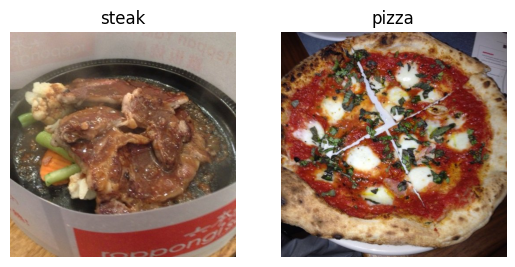

In [26]:
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [28]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [29]:
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [30]:
len(train_data)

47

In [31]:
images[:2], images[0].shape

(array([[[[0.5294118 , 0.30588236, 0.23137257],
          [0.57254905, 0.36078432, 0.25882354],
          [0.6117647 , 0.4156863 , 0.2784314 ],
          ...,
          [0.07450981, 0.12941177, 0.07058824],
          [0.05882353, 0.1137255 , 0.05490196],
          [0.0627451 , 0.11764707, 0.05882353]],
 
         [[0.5647059 , 0.38823533, 0.29803923],
          [0.5882353 , 0.4156863 , 0.30980393],
          [0.63529414, 0.4666667 , 0.34117648],
          ...,
          [0.07450981, 0.12156864, 0.07450981],
          [0.0627451 , 0.10980393, 0.0627451 ],
          [0.06666667, 0.1137255 , 0.06666667]],
 
         [[0.63529414, 0.52156866, 0.35686275],
          [0.6431373 , 0.5294118 , 0.35686275],
          [0.6745098 , 0.5529412 , 0.3803922 ],
          ...,
          [0.08627451, 0.1254902 , 0.08235294],
          [0.07450981, 0.1137255 , 0.07058824],
          [0.07450981, 0.1137255 , 0.07058824]],
 
         ...,
 
         [[0.8352942 , 0.9294118 , 0.93725497],
          [0.83137

In [32]:
images[7].shape

(224, 224, 3)

In [33]:
labels

array([1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1.,
       1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

In [34]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [35]:
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [36]:
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [37]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_2 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten (Flatten)           (None, 475240)            0         
                                                                 
 dense (Dense)               (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model



In [38]:
len(train_data), len(test_data)

(47, 16)

In [39]:
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 32s 360ms/step - loss: 0.6369 - accuracy: 0.7000 - val_loss: 0.4600 - val_accuracy: 0.7860
Epoch 2/5
47/47 [==============================] - 14s 297ms/step - loss: 0.3535 - accuracy: 0.8620 - val_loss: 0.3589 - val_accuracy: 0.8480
Epoch 3/5
47/47 [==============================] - 15s 318ms/step - loss: 0.1970 - accuracy: 0.9320 - val_loss: 0.4549 - val_accuracy: 0.7700
Epoch 4/5
47/47 [==============================] - 12s 264ms/step - loss: 0.0788 - accuracy: 0.9840 - val_loss: 0.4483 - val_accuracy: 0.8240
Epoch 5/5
47/47 [==============================] - 10s 221ms/step - loss: 0.0236 - accuracy: 0.9980 - val_loss: 0.4280 - val_accuracy: 0.8380


### 5. Evaluating our model

<Axes: >

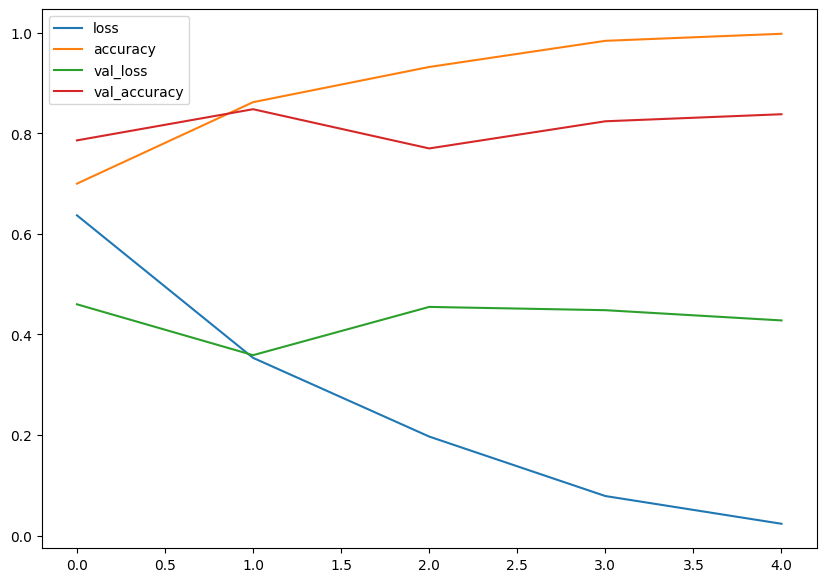

In [40]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [41]:
history_4.history["loss"]

[0.6369497179985046,
 0.35353192687034607,
 0.19701501727104187,
 0.07875501364469528,
 0.02360229194164276]

In [42]:
def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

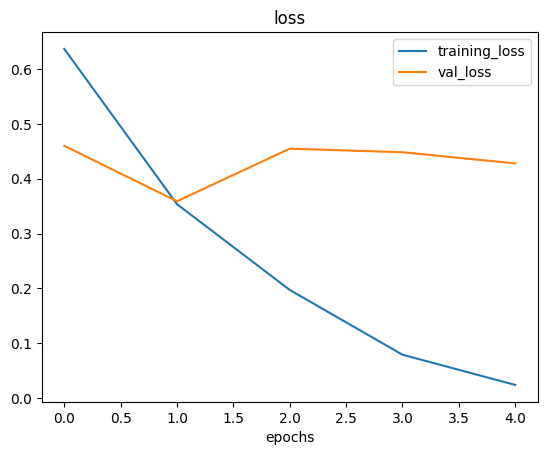

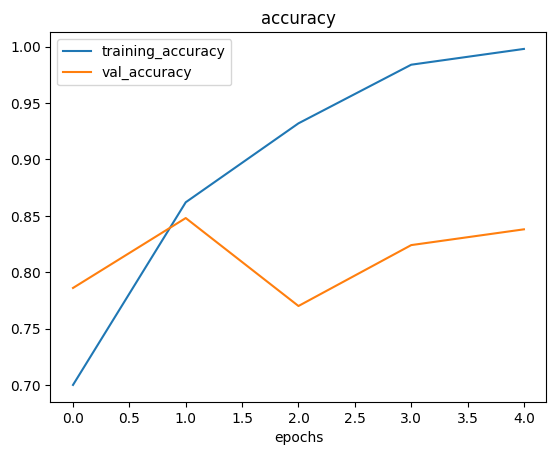

In [43]:
plot_loss_curves(history_4)

### 6. Adjust the model parameters

In [44]:
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [45]:
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [46]:
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 199ms/step - loss: 0.6578 - accuracy: 0.6393 - val_loss: 0.5738 - val_accuracy: 0.7340
Epoch 2/5
47/47 [==============================] - 10s 212ms/step - loss: 0.4844 - accuracy: 0.7807 - val_loss: 0.4038 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 11s 227ms/step - loss: 0.4361 - accuracy: 0.8093 - val_loss: 0.3722 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 11s 234ms/step - loss: 0.4335 - accuracy: 0.8107 - val_loss: 0.3530 - val_accuracy: 0.8360
Epoch 5/5
47/47 [==============================] - 15s 322ms/step - loss: 0.3782 - accuracy: 0.8413 - val_loss: 0.3264 - val_accuracy: 0.8740


In [47]:
model_5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 10)     0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 10)      

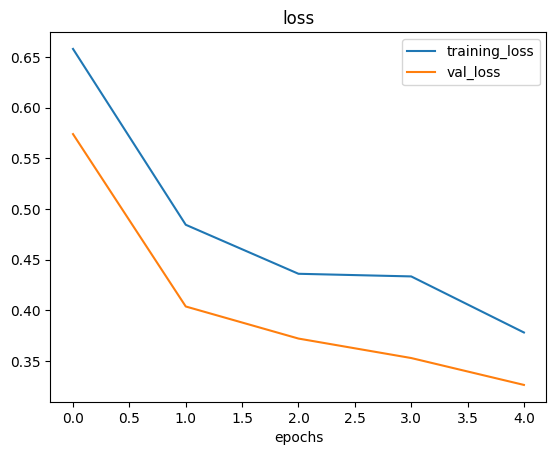

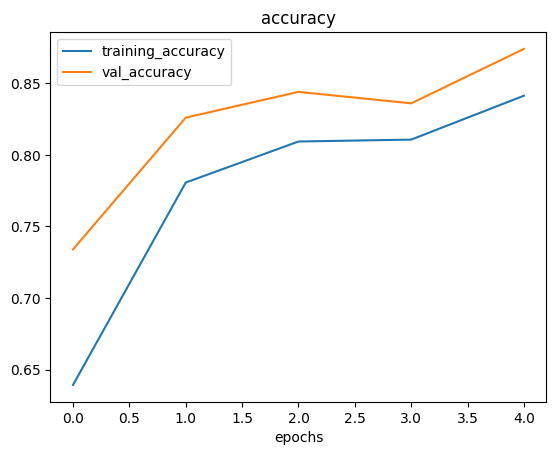

In [48]:
plot_loss_curves(history_5)

## Opening our bag of tricks and finding data augmentation

In [49]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

train_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)

In [50]:
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False)

print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

IMG_SIZE = (224, 224)
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="binary")

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


In [51]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

showing image number: 10


(-0.5, 223.5, 223.5, -0.5)

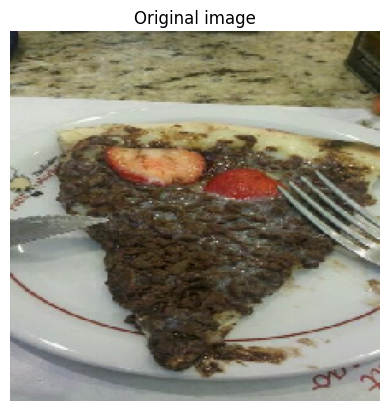

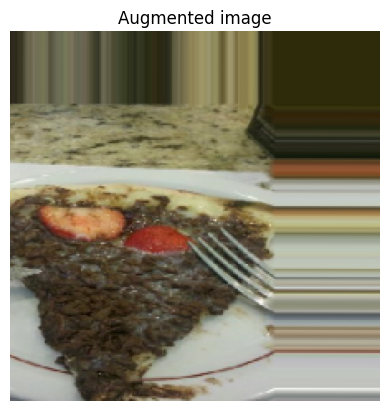

In [52]:
import random
random_number = random.randint(0, 32)
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)

In [53]:
model_6 = Sequential([
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 31s 629ms/step - loss: 0.7291 - accuracy: 0.4580 - val_loss: 0.6921 - val_accuracy: 0.5080
Epoch 2/5
47/47 [==============================] - 33s 699ms/step - loss: 0.6932 - accuracy: 0.4887 - val_loss: 0.6881 - val_accuracy: 0.5060
Epoch 3/5
47/47 [==============================] - 27s 579ms/step - loss: 0.6961 - accuracy: 0.5100 - val_loss: 0.6876 - val_accuracy: 0.5080
Epoch 4/5
47/47 [==============================] - 41s 877ms/step - loss: 0.6939 - accuracy: 0.4840 - val_loss: 0.6891 - val_accuracy: 0.5680
Epoch 5/5
47/47 [==============================] - 31s 658ms/step - loss: 0.6926 - accuracy: 0.5300 - val_loss: 0.6864 - val_accuracy: 0.5880


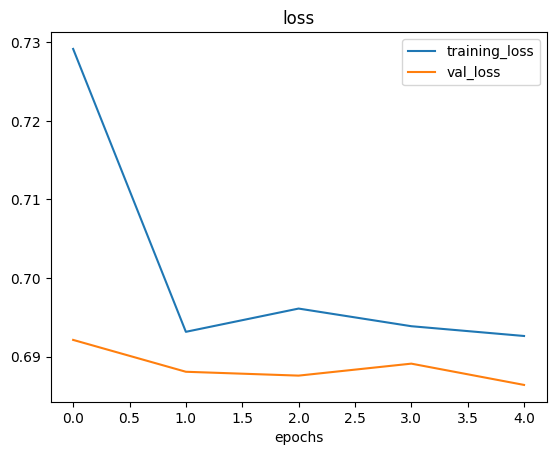

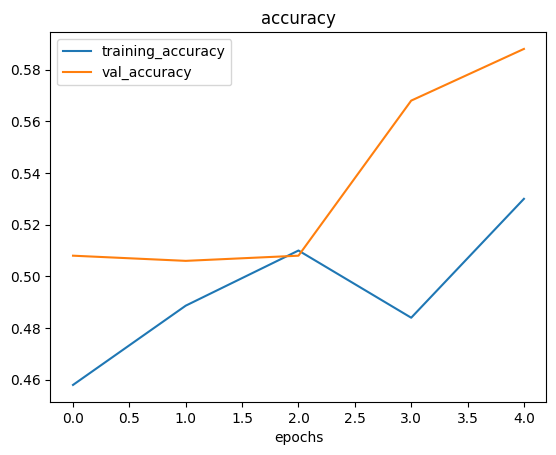

In [54]:
plot_loss_curves(history_6)

In [55]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            class_mode="binary",
                                                                            batch_size=32,
                                                                            shuffle=True)

Found 1500 images belonging to 2 classes.


In [56]:
model_7 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 499ms/step - loss: 0.6955 - accuracy: 0.5453 - val_loss: 0.6410 - val_accuracy: 0.7680
Epoch 2/5
47/47 [==============================] - 35s 742ms/step - loss: 0.5964 - accuracy: 0.7087 - val_loss: 0.4354 - val_accuracy: 0.8160
Epoch 3/5
47/47 [==============================] - 30s 638ms/step - loss: 0.5477 - accuracy: 0.7253 - val_loss: 0.4489 - val_accuracy: 0.8260
Epoch 4/5
47/47 [==============================] - 37s 793ms/step - loss: 0.5104 - accuracy: 0.7653 - val_loss: 0.4182 - val_accuracy: 0.8180
Epoch 5/5
47/47 [==============================] - 48s 1s/step - loss: 0.4965 - accuracy: 0.7673 - val_loss: 0.3476 - val_accuracy: 0.8600


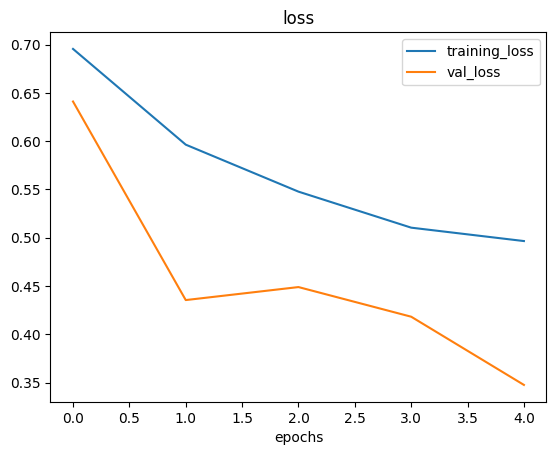

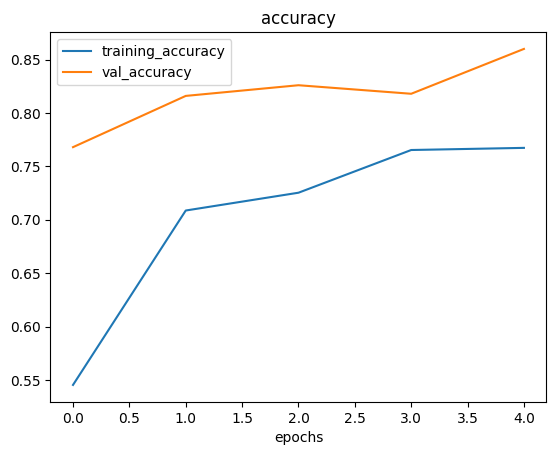

In [57]:
plot_loss_curves(history_7)

### 7. Repeat until satisfied

## Making a prediction on our custom data

In [58]:
print(class_names)

['pizza' 'steak']


--2023-04-20 15:51:46--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2023-04-20 15:51:46 (33.6 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

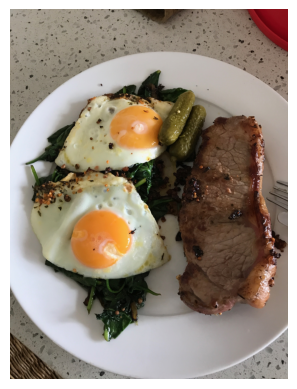

In [59]:
import matplotlib.image as mpimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

In [60]:
def load_and_prep_image(filename, img_shape=224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, size=[img_shape, img_shape])
  img = img/255.
  return img

In [61]:
steak = load_and_prep_image("03-steak.jpeg")

In [62]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

1/1 [==============================] - 0s 262ms/step


array([[0.87862337]], dtype=float32)

In [63]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [64]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [65]:
def pred_and_plot(model, filename, class_names=class_names):
  img = load_and_prep_image(filename)

  pred = model.predict(tf.expand_dims(img, axis=0))

  pred_class = class_names[int(tf.round(pred))]

  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 54ms/step


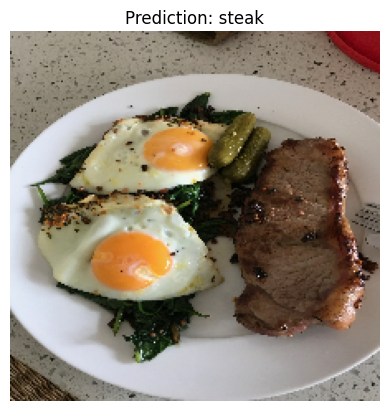

In [66]:
pred_and_plot(model_7, "03-steak.jpeg")

--2023-04-20 15:51:52--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.07s   

2023-04-20 15:51:53 (40.9 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 [==============================] - 0s 116ms/step


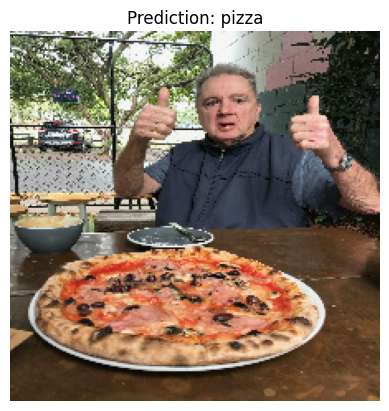

In [67]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

pred_and_plot(model_7, "03-pizza-dad.jpeg")

# Multi-class Image Classification

## 1. Import and become one wih the data

In [68]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-04-20 15:51:55--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.132.128, 74.125.201.128, 74.125.202.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.132.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M  46.0MB/s    in 5.4s    

2023-04-20 15:52:00 (92.2 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [69]:
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.

In [70]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [71]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [72]:
print(pathlib.Path(train_dir))
print(data_dir.glob('*'))

10_food_classes_all_data/train
<generator object Path.glob at 0x7fc52bf25740>


['423763.jpg']
Image shape: (512, 512, 3)


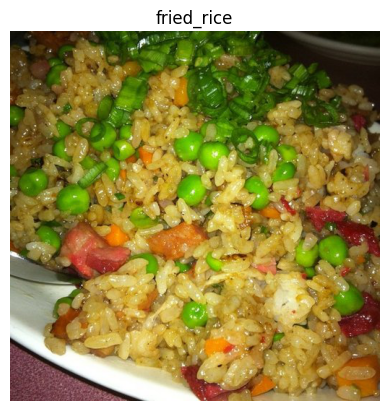

In [73]:
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

## 2. Preprocess the data (prepare it for a model)

In [74]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## 3. Create a model (start with a baseline)

In [76]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

model_8 = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3)),
    Activation(activation=tf.keras.activations.relu),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

model_8.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

## 4. Fit a model

In [77]:
history_8 = model_8.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 63s 254ms/step - loss: 2.1703 - accuracy: 0.1957 - val_loss: 2.0476 - val_accuracy: 0.2576
Epoch 2/5
235/235 [==============================] - 60s 255ms/step - loss: 1.9034 - accuracy: 0.3381 - val_loss: 1.9024 - val_accuracy: 0.3252
Epoch 3/5
235/235 [==============================] - 62s 266ms/step - loss: 1.5257 - accuracy: 0.4813 - val_loss: 1.9695 - val_accuracy: 0.3364
Epoch 4/5
235/235 [==============================] - 72s 308ms/step - loss: 0.9722 - accuracy: 0.6757 - val_loss: 2.4325 - val_accuracy: 0.3020
Epoch 5/5
235/235 [==============================] - 67s 284ms/step - loss: 0.4311 - accuracy: 0.8624 - val_loss: 3.6582 - val_accuracy: 0.2840


## 5. Evaluate the model

In [78]:
model_8.evaluate(test_data)

79/79 [==============================] - 12s 148ms/step - loss: 3.6582 - accuracy: 0.2840


[3.6582460403442383, 0.2840000092983246]

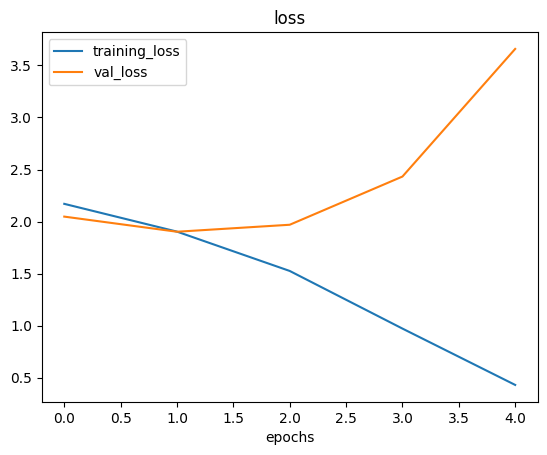

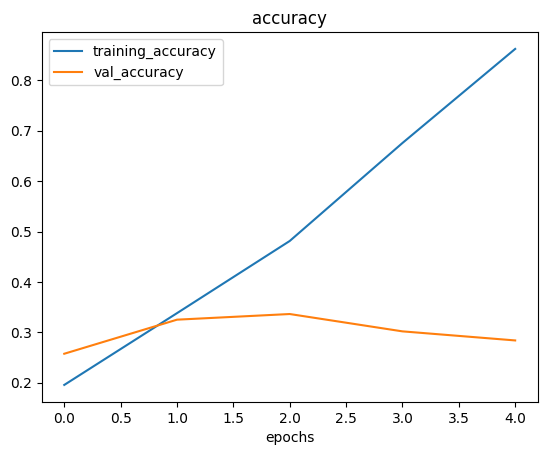

In [79]:
plot_loss_curves(history_8)

## 6. Adjust the model hyperparameters (to beat the baseline/reduce overfitting)

In [80]:
model_9 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

model_9.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [81]:
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 60s 250ms/step - loss: 2.1811 - accuracy: 0.2396 - val_loss: 1.9645 - val_accuracy: 0.2992
Epoch 2/5
235/235 [==============================] - 72s 306ms/step - loss: 1.7869 - accuracy: 0.3839 - val_loss: 1.9365 - val_accuracy: 0.3192
Epoch 3/5
235/235 [==============================] - 60s 255ms/step - loss: 1.4407 - accuracy: 0.5249 - val_loss: 1.9780 - val_accuracy: 0.3304
Epoch 4/5
235/235 [==============================] - 49s 207ms/step - loss: 1.0050 - accuracy: 0.6793 - val_loss: 2.3037 - val_accuracy: 0.3104
Epoch 5/5
235/235 [==============================] - 48s 206ms/step - loss: 0.6247 - accuracy: 0.8105 - val_loss: 2.7858 - val_accuracy: 0.2944


In [81]:
plot_loss_curves(history_9)

In [82]:
model_9.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 29160)             0         
                                                                 
 dense_6 (Dense)             (None, 10)               

In [83]:
model_8.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation_1 (Activation)   (None, 222, 222, 10)      0         
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                      

### Trying to reduce overfitting with data augmentation

In [84]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [86]:
model_10 = tf.keras.models.clone_model(model_8)

model_10.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

In [87]:
history_10 = model_10.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 149s 615ms/step - loss: 2.2432 - accuracy: 0.1648 - val_loss: 2.1066 - val_accuracy: 0.2480
Epoch 2/5
235/235 [==============================] - 120s 512ms/step - loss: 2.1175 - accuracy: 0.2469 - val_loss: 2.0255 - val_accuracy: 0.2844
Epoch 3/5
235/235 [==============================] - 119s 505ms/step - loss: 2.0764 - accuracy: 0.2636 - val_loss: 1.8964 - val_accuracy: 0.3444
Epoch 4/5
235/235 [==============================] - 117s 498ms/step - loss: 1.9889 - accuracy: 0.3035 - val_loss: 1.8395 - val_accuracy: 0.3760
Epoch 5/5
235/235 [==============================] - 118s 501ms/step - loss: 1.9466 - accuracy: 0.3199 - val_loss: 1.7825 - val_accuracy: 0.3828


In [88]:
model_8.evaluate(test_data)

79/79 [==============================] - 12s 147ms/step - loss: 3.6582 - accuracy: 0.2840


[3.658245801925659, 0.2840000092983246]

In [89]:
model_10.evaluate(test_data)

79/79 [==============================] - 12s 151ms/step - loss: 1.7825 - accuracy: 0.3828


[1.7825043201446533, 0.38280001282691956]

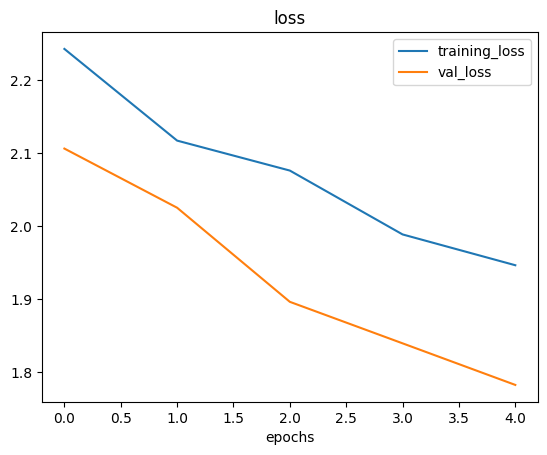

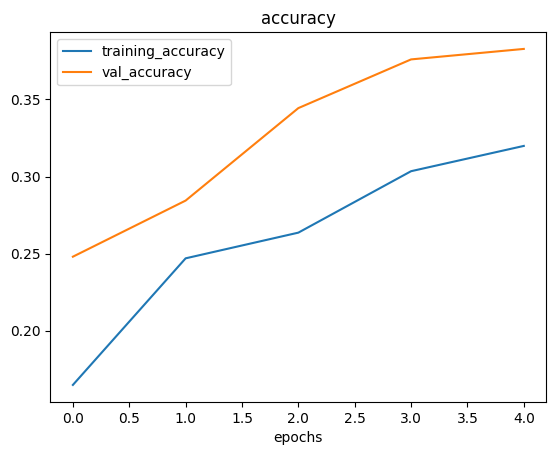

In [90]:
plot_loss_curves(history_10)

### Making a prediction with our trained model

In [91]:
# Download some custom images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2023-04-20 16:18:09--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.1’

03-pizza-dad.jpeg.1 100%[===================>]   2.74M  --.-KB/s    in 0.07s   

2023-04-20 16:18:09 (40.0 MB/s) - ‘03-pizza-dad.jpeg.1’ saved [2874848/2874848]

--2023-04-20 16:18:09--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awai

In [92]:
# Reconfig pred_and_plot function to work with multi-class images
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Add in logic for multi-class & get pred_class name
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 153ms/step


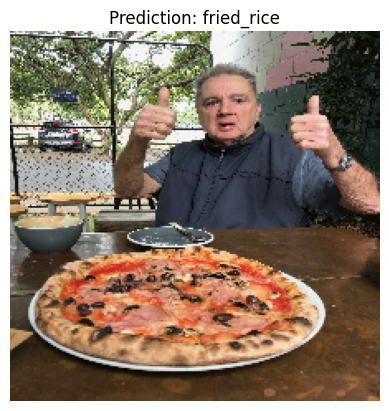

In [93]:
# Make a prediction using model_10
pred_and_plot(model=model_10,
              filename="03-pizza-dad.jpeg",
              class_names=class_names)

1/1 [==============================] - 0s 19ms/step


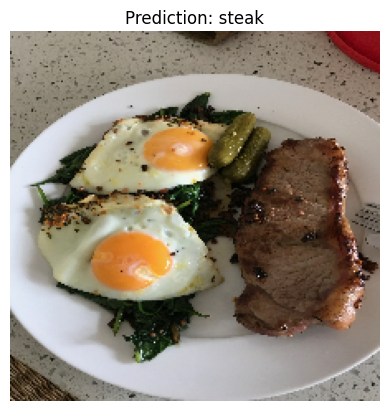

In [94]:
pred_and_plot(model=model_10,
              filename="03-steak.jpeg",
              class_names=class_names)

1/1 [==============================] - 0s 19ms/step


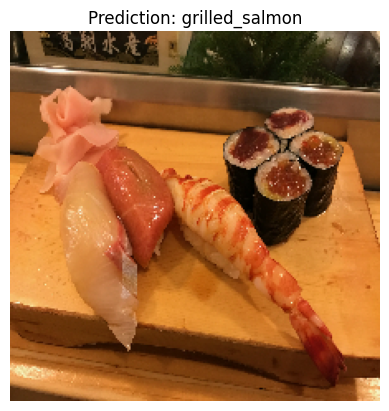

In [95]:
pred_and_plot(model=model_10,
              filename="03-sushi.jpeg",
              class_names=class_names)

1/1 [==============================] - 0s 20ms/step


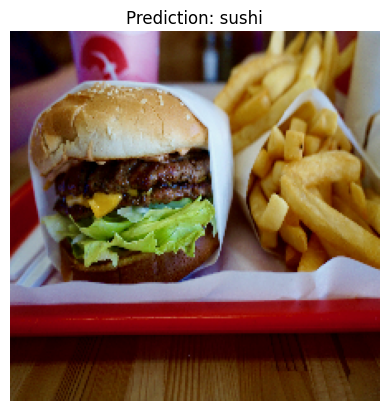

In [96]:
pred_and_plot(model=model_10,
              filename="03-hamburger.jpeg",
              class_names=class_names)

In [98]:
# Good news: our updated pred_and_plot function works for binary classification too...
# pred_and_plot(model=model_3, # trained on pizza vs. steak
#               filename="03-steak.jpeg",
#               class_names=["pizza", "steak"])

## Saving and loading our model

In [99]:
model_10.save("saved_trained_model_10")

In [100]:
loaded_model_10 = tf.keras.models.load_model("saved_trained_model_10")
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 12s 148ms/step - loss: 1.7825 - accuracy: 0.3828


[1.7825044393539429, 0.38280001282691956]

In [101]:
model_10.evaluate(test_data)

79/79 [==============================] - 12s 150ms/step - loss: 1.7825 - accuracy: 0.3828


[1.7825044393539429, 0.38280001282691956]